In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
tbl = pd.read_csv("/shared-data/csvdata/ah_quantitytype.csv", nrows=None)
tbl.head(5)


/tmp/ipykernel_3543/3847609733.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  tbl = pd.read_csv("/shared-data/csvdata/ah_quantitytype.csv", nrows=None)


,Unnamed: 0,bd_id,startDate,endDate,type,unit,value
0,0,3,2020-12-03 12:49:08,2020-12-03 12:49:08,HKQuantityTypeIdentifierBodyMassIndex,count,35.4
1,1,3,2021-10-18 08:25:04,2021-10-18 08:25:04,HKQuantityTypeIdentifierBodyMassIndex,count,37.9
2,2,3,2021-11-03 09:39:04,2021-11-03 09:39:04,HKQuantityTypeIdentifierBodyMassIndex,count,37.6
3,3,3,2021-11-15 10:46:15,2021-11-15 10:46:15,HKQuantityTypeIdentifierBodyMassIndex,count,37.5
4,4,3,2021-11-23 11:47:24,2021-11-23 11:47:24,HKQuantityTypeIdentifierBodyMassIndex,count,37.7
5,5,3,2021-12-13 08:14:58,2021-12-13 08:14:58,HKQuantityTypeIdentifierBodyMassIndex,count,36.9
6,6,3,2021-12-20 07:54:44,2021-12-20 07:54:44,HKQuantityTypeIdentifierBodyMassIndex,count,37.1
7,7,3,2021-12-27 11:29:56,2021-12-27 11:29:56,HKQuantityTypeIdentifierBodyMassIndex,count,36.4
8,8,3,2022-01-03 10:32:03,2022-01-03 10:32:03,HKQuantityTypeIdentifierBodyMassIndex,count,36.6
9,9,3,2022-01-17 13:03:35,2022-01-17 13:03:35,HKQuantityTypeIdentifierBodyMassIndex,count,36.2


In [4]:
df = tbl.copy()
df["mydate"] = pd.to_datetime(df["startDate"])
df = df[df["mydate"]>pd.to_datetime("2022-02-01")]
df = df[df["mydate"]<pd.to_datetime("2022-02-07")]
df = df.set_index("mydate")


In [126]:
df["bd_id"].unique()


array([ 3, 16, 21, 25, 26, 29, 47, 55, 58, 78])

In [127]:
df["type"].value_counts()[:40]


HKQuantityTypeIdentifierActiveEnergyBurned                45462
HKQuantityTypeIdentifierBasalEnergyBurned                 27216
HKQuantityTypeIdentifierHeartRate                         18261
HKQuantityTypeIdentifierDistanceWalkingRunning            14017
HKQuantityTypeIdentifierBloodGlucose                       8962
HKQuantityTypeIdentifierStepCount                          5464
HKQuantityTypeIdentifierDistanceCycling                    3919
HKQuantityTypeIdentifierInsulinDelivery                    2765
HKQuantityTypeIdentifierAppleExerciseTime                  2058
HKQuantityTypeIdentifierAppleStandTime                     1773
HKQuantityTypeIdentifierWalkingSpeed                       1346
HKQuantityTypeIdentifierWalkingStepLength                  1346
HKQuantityTypeIdentifierHeadphoneAudioExposure             1261
HKQuantityTypeIdentifierWalkingDoubleSupportPercentage      907
HKQuantityTypeIdentifierFlightsClimbed                      572
HKCategoryTypeIdentifierAppleStandHour  

In [13]:
cs = df[df["type"]=="HKQuantityTypeIdentifierDietaryCarbohydrates"]
cs.shape, cs["bd_id"].unique()

((83, 7), array([25, 78]))

In [59]:
typename = "HKQuantityTypeIdentifierHeartRate"
hr = df[df["type"]==typename]
hr.shape, hr["bd_id"].unique()


((18261, 7), array([ 3, 16, 29, 47, 55, 58, 78]))

In [14]:
typename = "HKCategoryTypeIdentifierSleepAnalysis"
ss = df[df["type"]==typename]
ss.shape, ss["bd_id"].unique()


((86, 7), array([26, 55]))

In [15]:
typename = "HKQuantityTypeIdentifierInsulinDelivery"
ia = df[df["type"]==typename]
ia.shape, ia["bd_id"].unique()
ia.sort_values("value").head()


,Unnamed: 0,bd_id,startDate,endDate,type,unit,value
mydate,,,,,,,
2022-02-05 08:30:59,6710506,25,2022-02-05 08:30:59,2022-02-05 08:51:03,HKQuantityTypeIdentifierInsulinDelivery,IU,0.0
2022-02-06 15:27:53,6710870,25,2022-02-06 15:27:53,2022-02-06 15:35:56,HKQuantityTypeIdentifierInsulinDelivery,IU,0.0
2022-02-06 15:35:56,6710872,25,2022-02-06 15:35:56,2022-02-06 15:36:00,HKQuantityTypeIdentifierInsulinDelivery,IU,0.0
2022-02-06 15:40:53,6710874,25,2022-02-06 15:40:53,2022-02-06 15:40:56,HKQuantityTypeIdentifierInsulinDelivery,IU,0.0
2022-02-03 23:50:55,6710020,25,2022-02-03 23:50:55,2022-02-03 23:50:58,HKQuantityTypeIdentifierInsulinDelivery,IU,0.0


In [16]:
typename = "HKQuantityTypeIdentifierActiveEnergyBurned"
aeb = df[df["type"]==typename]
print(aeb.shape, aeb["bd_id"].unique())
aeb.sort_values("value").tail()


(45462, 7) [ 3 16 29 47 55 58 78]


,Unnamed: 0,bd_id,startDate,endDate,type,unit,value
mydate,,,,,,,
2022-02-03 16:56:30,15374683,78,2022-02-03 16:56:30,2022-02-03 18:16:09,HKQuantityTypeIdentifierActiveEnergyBurned,kcal,610.521
2022-02-01 09:46:11,7802432,29,2022-02-01 09:46:11,2022-02-01 10:24:15,HKQuantityTypeIdentifierActiveEnergyBurned,kcal,610.82
2022-02-06 20:15:01,15379313,78,2022-02-06 20:15:01,2022-02-06 21:30:24,HKQuantityTypeIdentifierActiveEnergyBurned,kcal,657.0
2022-02-04 17:52:08,15375226,78,2022-02-04 17:52:08,2022-02-04 19:06:14,HKQuantityTypeIdentifierActiveEnergyBurned,kcal,745.0
2022-02-06 20:09:19,15379312,78,2022-02-06 20:09:19,2022-02-06 21:30:02,HKQuantityTypeIdentifierActiveEnergyBurned,kcal,842.0


In [17]:
typename = "HKQuantityTypeIdentifierBasalEnergyBurned"
beb = df[df["type"]==typename]
beb.shape, beb["bd_id"].unique()
beb.sort_values("value").tail()


,Unnamed: 0,bd_id,startDate,endDate,type,unit,value
mydate,,,,,,,
2022-02-02 08:26:38,8953237,47,2022-02-02 08:26:38,2022-02-02 10:32:40,HKQuantityTypeIdentifierBasalEnergyBurned,kcal,136.554
2022-02-02 12:25:08,8953239,47,2022-02-02 12:25:08,2022-02-02 14:31:33,HKQuantityTypeIdentifierBasalEnergyBurned,kcal,136.979
2022-02-01 02:27:09,8953222,47,2022-02-01 02:27:09,2022-02-01 04:35:55,HKQuantityTypeIdentifierBasalEnergyBurned,kcal,139.531
2022-02-01 20:26:00,8953231,47,2022-02-01 20:26:00,2022-02-01 22:35:33,HKQuantityTypeIdentifierBasalEnergyBurned,kcal,140.372
2022-02-02 22:29:20,8953244,47,2022-02-02 22:29:20,2022-02-03 01:17:12,HKQuantityTypeIdentifierBasalEnergyBurned,kcal,181.894


In [18]:
bs = df[df["type"]=="HKQuantityTypeIdentifierBloodGlucose"]
bs.shape, bs["bd_id"].unique()


((8962, 7), array([16, 25, 26, 58, 78]))

<AxesSubplot:xlabel='mydate'>

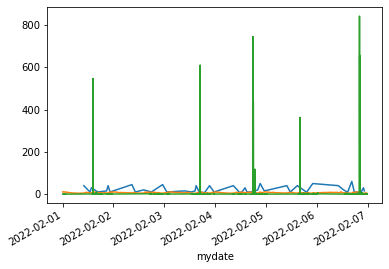

In [19]:
def myfloat(x):
    try:
        return float(x)
    except:
        return np.nan
    
bd_id = 78 # 25
cs.loc[cs["bd_id"]==bd_id,"value"].plot()
bs.loc[bs["bd_id"]==bd_id,"value"].apply(myfloat).plot()     
aeb.loc[aeb["bd_id"]==bd_id,"value"].apply(myfloat).plot()     
#ss.loc[ss["bd_id"]==bd_id,"value"].apply(myfloat).plot()     

      

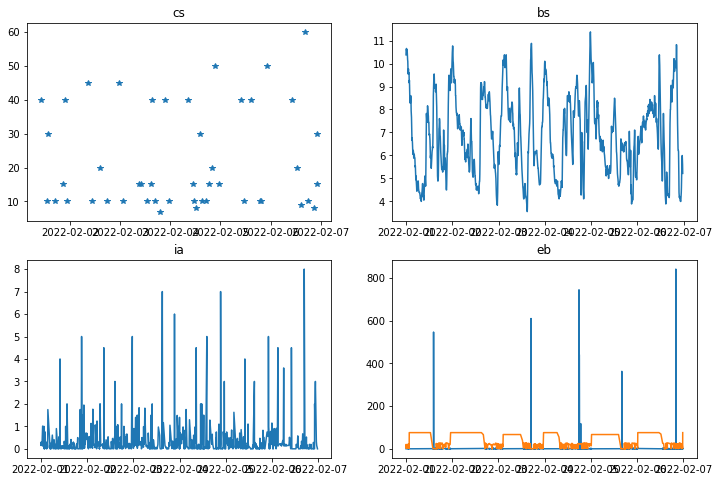

In [62]:
bd_id = 78 # 25
fig, axs = plt.subplots(2,2, figsize=(12,8))
axs[0,0].plot(cs.loc[cs["bd_id"]==bd_id,["value"]].sort_index(),"*")
axs[0,0].set_title("cs")
axs[0,1].plot(bs.loc[bs["bd_id"]==bd_id,"value"].apply(myfloat).sort_index())     
axs[0,1].set_title("bs")
axs[1,0].plot(ia.loc[ia["bd_id"]==bd_id,"value"].apply(myfloat).sort_index())     
axs[1,0].set_title("ia")
axs[1,1].plot(aeb.loc[aeb["bd_id"]==bd_id,"value"].apply(myfloat).sort_index())     
axs[1,1].plot(beb.loc[beb["bd_id"]==bd_id,"value"].apply(myfloat).sort_index())     
axs[1,1].set_title("eb")

#axs[0,0].legend(["cs","bs","aeb","beb"][2:])
#ss.loc[ss["bd_id"]==bd_id,"value"].apply(myfloat).plot()     
plt.show()

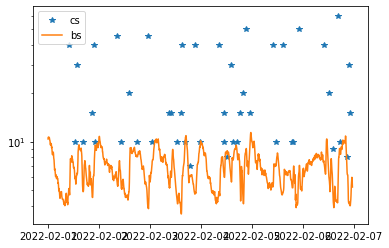

In [145]:
bd_id = 78 # 25
plt.semilogy(cs.loc[cs["bd_id"]==bd_id,["value"]],"*")
plt.semilogy(bs.loc[bs["bd_id"]==bd_id,"value"].apply(myfloat))     
#plt.semilogy(aeb.loc[aeb["bd_id"]==bd_id,"value"].apply(myfloat))     
#plt.semilogy(beb.loc[beb["bd_id"]==bd_id,"value"].apply(myfloat))     
plt.legend(["cs","bs","aeb","beb"][:2])
#ss.loc[ss["bd_id"]==bd_id,"value"].apply(myfloat).plot()     
plt.show()


In [120]:
bs.loc[bs["bd_id"]==bd_id,"value"]

Series([], Name: value, dtype: object)

In [55]:
df.head()


,Unnamed: 0,bd_id,startDate,endDate,type,unit,value
mydate,,,,,,,
2020-12-03 12:49:08,0,3,2020-12-03 12:49:08,2020-12-03 12:49:08,HKQuantityTypeIdentifierBodyMassIndex,count,35.4
2021-10-18 08:25:04,1,3,2021-10-18 08:25:04,2021-10-18 08:25:04,HKQuantityTypeIdentifierBodyMassIndex,count,37.9
2021-11-03 09:39:04,2,3,2021-11-03 09:39:04,2021-11-03 09:39:04,HKQuantityTypeIdentifierBodyMassIndex,count,37.6
2021-11-15 10:46:15,3,3,2021-11-15 10:46:15,2021-11-15 10:46:15,HKQuantityTypeIdentifierBodyMassIndex,count,37.5
2021-11-23 11:47:24,4,3,2021-11-23 11:47:24,2021-11-23 11:47:24,HKQuantityTypeIdentifierBodyMassIndex,count,37.7


In [47]:
#ti = pd.date_range(start="2018-01-01", end="2018-01-02", freq="H")
#n = len(ti)

def distribute_interval(value, start, end, freq):
    ti = pd.date_range(start=start, end=end, freq=freq)
    n = len(ti) 
    return pd.DataFrame(np.ones(n)*value/n, index=ti, columns=["value"])

#distribute_interval(75., start="2018-01-01", end="2018-01-02", freq="min")

tst = ia[ia["bd_id"]==78].sort_index().tail(100)
tst


,Unnamed: 0,bd_id,startDate,endDate,type,unit,value
mydate,,,,,,,
2022-02-06 04:53:10,16007740,78,2022-02-06 04:53:10,2022-02-06 04:53:20,HKQuantityTypeIdentifierInsulinDelivery,IU,0.125
2022-02-06 05:18:23,16007741,78,2022-02-06 05:18:23,2022-02-06 05:18:47,HKQuantityTypeIdentifierInsulinDelivery,IU,0.3
2022-02-06 05:38:23,16007742,78,2022-02-06 05:38:23,2022-02-06 05:38:53,HKQuantityTypeIdentifierInsulinDelivery,IU,0.375
2022-02-06 05:48:24,16007743,78,2022-02-06 05:48:24,2022-02-06 05:48:40,HKQuantityTypeIdentifierInsulinDelivery,IU,0.2
2022-02-06 06:00:00,16007756,78,2022-02-06 06:00:00,2022-02-06 09:00:00,HKQuantityTypeIdentifierInsulinDelivery,IU,3.6
...,...,...,...,...,...,...,...
2022-02-06 22:56:30,16007836,78,2022-02-06 22:56:30,2022-02-06 22:56:56,HKQuantityTypeIdentifierInsulinDelivery,IU,0.325
2022-02-06 23:01:30,16007837,78,2022-02-06 23:01:30,2022-02-06 23:01:50,HKQuantityTypeIdentifierInsulinDelivery,IU,0.25
2022-02-06 23:06:32,16007838,78,2022-02-06 23:06:32,2022-02-06 23:06:44,HKQuantityTypeIdentifierInsulinDelivery,IU,0.15


In [48]:
#for idx, row in df.head().iterrows():
#    print(row["startDate"],row["endDate"],row["value"])
    
def expand_intervals(df_):
    temp = [distribute_interval(row["value"], row["startDate"],row["endDate"], freq="min") 
               for idx, row in df_.iterrows()]
    return pd.concat(temp)

tmp = expand_intervals(tst)
tmp

,value
2022-02-06 04:53:10,0.12500
2022-02-06 05:18:23,0.30000
2022-02-06 05:38:23,0.37500
2022-02-06 05:48:24,0.20000
2022-02-06 06:00:00,0.01989
...,...
2022-02-06 23:56:32,0.00000
2022-02-06 23:57:32,0.00000
2022-02-06 23:58:32,0.00000
2022-02-06 23:59:32,0.00000


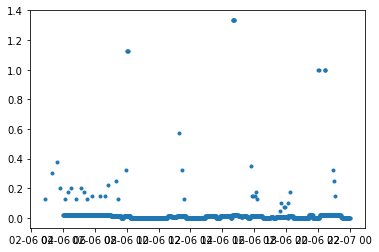

In [49]:
plt.plot(tmp, '.')
plt.show()


In [52]:
start = tmp.index[0]
start

Timestamp('2022-02-06 04:53:10')

value    34.793496
dtype: float64 value    34.793496
dtype: float64


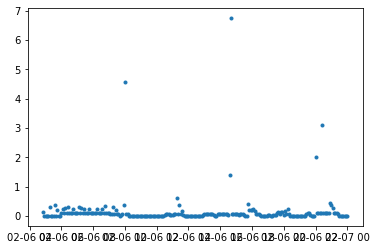

,value
2022-02-06 04:50:00,0.125
2022-02-06 04:55:00,0.000
2022-02-06 05:00:00,0.000
2022-02-06 05:05:00,0.000
2022-02-06 05:10:00,0.000
...,...
2022-02-06 23:40:00,0.000
2022-02-06 23:45:00,0.000
2022-02-06 23:50:00,0.000
2022-02-06 23:55:00,0.000


In [58]:
val = tmp.resample('5min').sum() # , origin='2022-02-06 04:53:00'
print(val.sum(), tmp.sum())
plt.plot(val, '.')
plt.show()
val